**Author:** Elias Rafael Ruiz-Morales

**Institution:** Wellcome Sanger institute

**September, 2023**



---

# Subset of data per infection

Subsets will be necessary for plots and cellphoneDB v4 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import sys
import anndata

import seaborn as sns 

import matplotlib.pyplot as plt
import matplotlib as mpl
import gc

In [2]:
def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.2
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
brotli              NA
cairo               1.20.0
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.03.1
dateutil            2.8.1
decorator           4.4.2
fsspec              0.8.7
get_version         2.1
google              NA
h5py                3.1.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jupyterlab_server   2.3.0
kiwisolver          1.3.1


'/opt/conda/bin/python'

### Note 
To run this chunk you need:

*rpy2==3.4.2  ///  anndata2ri==1.0.6*

In [6]:
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri

import rpy2.rinterface_lib.callbacks
import logging
# Itoliste R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## Loading data

In [3]:
adata= sc.read('../results/scVI/rna8_scVIintegrated_latent30_All_20230707.h5ad')


In [4]:
adata

AnnData object with n_obs × n_vars = 113028 × 36601
    obs: 'sample', 'stage', 'hpi', 'infection', 'percent_mito', 'n_counts', 'sample_barcode', 'assignment_SoC', 'donor_id', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'S_score', 'G2M_score', 'phase', 'n_genes_by_counts', 'total_counts', 'total_counts_hs', 'pct_counts_hs', 'total_counts_tg', 'pct_counts_tg', 'Tg_infected', 'n_genes', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'leiden_scvi', 'celltype_predictions', 'probabilities', 'scrublet_doublet', 'cell_type_2022', 'cell_type', 'souporcell_MFgenotype', 'MFgenotype', 'cell_type_broad', 'umap_density_Tg_infected', 'stage_perInfection', 'celltype-Stage', 'Tg_intracellular', 'celltype-Intracellular', 'Dev_Stage'
    var: 'gene_ids', 'feature_types', 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'Dev_Stage_colors', 'MFgeno

### Setting up color palette for future plots

In [5]:
sc.set_figure_params(figsize=(5,5))

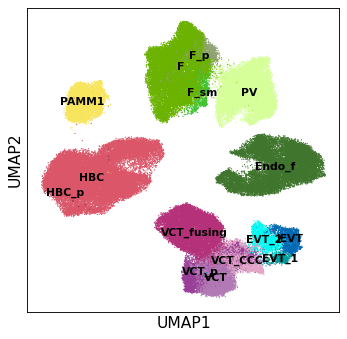

In [6]:
sc.pl.umap(adata, color=['cell_type'], size=5,
            title='', legend_loc='on data',legend_fontsize='x-small')

# Preparing subset objects for downstream analysis

## Subset Listeria infection assay only

In [10]:
#taking alldonors first for DEGs
adata_subset= adata[[ i in ['Pla_HDBR12330712', 'Pla_HDBR12330713',# 'Pla_HDBR12330714','Pla_HDBR12330715',
 'Pla_HDBR13661571', 'Pla_HDBR13661572'] #'Pla_HDBR13661575', 'Pla_HDBR13661576'
  for i in adata.obs['sample']  ]]

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [11]:
adata_subset.obs.hpi

Pla_HDBR12330712_AAACCCAAGTCGTTAC    24h
Pla_HDBR12330712_AAACCCACAACCGTAT    24h
Pla_HDBR12330712_AAACCCAGTATGCTTG    24h
Pla_HDBR12330712_AAACCCAGTCGCAACC    24h
Pla_HDBR12330712_AAACCCAGTGAACGGT    24h
                                    ... 
Pla_HDBR13661572_TTTGTTGAGGTTCATC    24h
Pla_HDBR13661572_TTTGTTGCAAATTAGG    24h
Pla_HDBR13661572_TTTGTTGCAATAGGGC    24h
Pla_HDBR13661572_TTTGTTGGTGCTTATG    24h
Pla_HDBR13661572_TTTGTTGGTGGTAACG    24h
Name: hpi, Length: 30835, dtype: category
Categories (1, object): ['24h']

#### Subset 24h

In [8]:
adata_d1 =adata_subset[[ i in ['24h'] for i in adata_subset.obs.hpi ]]
adata_d1.write ('../results/scVI/listeria_singleCell_24h.h5ad')

In [9]:
adata_d1.obs['stage_perInfection'].values.describe()

,counts,freqs
categories,,
Lm_24h,17778,0.576553
UI_Lm_24h,13057,0.423447


In [10]:
adata_d1.obs['donor_id'].values.describe()

,counts,freqs
categories,,
Hrv135,7325,0.237555
Hrv136,6047,0.196108
Hrv236,17463,0.566337


In [12]:
adata_d1 =adata_subset[[ i in ['24h'] for i in adata_subset.obs.hpi ]]


In [13]:
#code to remove un-needed columns in obs. Helps to speed up the operability with R
idx = ['sample', 'hpi', 'stage', '_scvi_labels', 'Tg_infected', 'leiden_scvi', 'souporcell_MFgenotype', 'MFgenotype', 'cell_type_broad','scrublet_score', 'scrublet_cluster_score', 'zscore', 
       'bh_pval', 'bonf_pval',  'percent_mito', 'n_counts', 'sample_barcode', 'assignment_SoC',
     'celltype_predictions', 'probabilities', 'scrublet_doublet', 'S_score', 'G2M_score', 'phase', 'n_genes', '_scvi_batch',
       '_scvi_local_l_mean', '_scvi_local_l_var',  'n_genes_by_counts', 'total_counts', 'total_counts_hs', 'pct_counts_hs', 
       'total_counts_tg', 'pct_counts_tg', 'Tg_intracellular', 'cell_type_2022']
for i in idx:
    try:
        del adata_d1.obs[i]
    except:
        continue
    
adata_d1.obs['infection'] = adata_d1.obs['infection'].astype(str)

del adata_d1.obsm
del adata_d1.obsp
del adata_d1.layers
del adata_d1.uns

Trying to set attribute `.obs` of view, copying.


In [14]:
adata_d1.X = adata_d1.X.toarray()

In [16]:
%%R -i adata_d1

library(Seurat)
so = as.Seurat(adata_d1, counts = "X", data = "X")

saveRDS(so, file = "../results/scVI/listeria_singleCell_24h.rds")

## Subset Malaria infection assay only

In [8]:
adata_subset= adata[[ i in ['Pla_HDBR11345033', 'Pla_HDBR11345034',
    'Pla_HDBR12966647', 'Pla_HDBR12966648',
    'Pla_HDBR13661565', 'Pla_HDBR13661566',
    #'Pla_HDBR13661567', 'Pla_HDBR13661568', 
    'Pla_HDBR13661569', 'Pla_HDBR13661570', 'Pla_HDBR13661573'] #, 'Pla_HDBR13661574']
    for i in adata.obs['sample']  ]]

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [9]:
adata_subset.obs.donor_id

Pla_HDBR11345033_AAACCCACAATAGTGA    Hrv124
Pla_HDBR11345033_AAACCCACAGCAAGAC    Hrv124
Pla_HDBR11345033_AAACCCATCCTCACGT    Hrv124
Pla_HDBR11345033_AAACCCATCGTCTAAG    Hrv124
Pla_HDBR11345033_AAACCCATCTCATTGT    Hrv124
                                      ...  
Pla_HDBR13661570_TTTGTTGGTCTTGCGG    Hrv236
Pla_HDBR13661570_TTTGTTGGTTCGGCGT    Hrv236
Pla_HDBR13661570_TTTGTTGGTTCTGAGT    Hrv236
Pla_HDBR13661570_TTTGTTGTCAGGAGAC    Hrv236
Pla_HDBR13661570_TTTGTTGTCGCACGGT    Hrv236
Name: donor_id, Length: 48775, dtype: category
Categories (4, object): ['Hrv124', 'Hrv168', 'Hrv232', 'Hrv236']

#### Subset 24h

In [13]:
adata_d1 =adata_subset[[ i in ['24h'] for i in adata_subset.obs.hpi ]]
adata_d1.write ('../results/scVI/malaria_singleCell_24h.h5ad')

In [14]:
adata_d1.obs['stage_perInfection'].values.describe()

,counts,freqs
categories,,
Pf_24h,27100,0.555613
UI_Pf_24h,21675,0.444387


In [15]:
adata_d1.obs['donor_id'].values.describe()

,counts,freqs
categories,,
Hrv124,10731,0.220010
Hrv168,15769,0.323301
Hrv232,4809,0.098596
Hrv236,17466,0.358093


In [10]:
adata_d1 =adata_subset[[ i in ['24h'] for i in adata_subset.obs.hpi ]]


In [12]:
del(adata_subset)
del(adata)

gc.collect()

776

In [13]:
#code to remove un-needed columns in obs. Helps to speed up the operability with R
idx = ['sample', 'hpi', 'stage', '_scvi_labels', 'Tg_infected', 'leiden_scvi', 'souporcell_MFgenotype', 'MFgenotype', 'cell_type_broad','scrublet_score', 'scrublet_cluster_score', 'zscore', 
       'bh_pval', 'bonf_pval',  'percent_mito', 'n_counts', 'sample_barcode', 'assignment_SoC',
     'celltype_predictions', 'probabilities', 'scrublet_doublet', 'S_score', 'G2M_score', 'phase', 'n_genes', '_scvi_batch',
       '_scvi_local_l_mean', '_scvi_local_l_var',  'n_genes_by_counts', 'total_counts', 'total_counts_hs', 'pct_counts_hs', 
       'total_counts_tg', 'pct_counts_tg', 'Tg_intracellular', 'cell_type_2022']
for i in idx:
    try:
        del adata_d1.obs[i]
    except:
        continue
    
adata_d1.obs['infection'] = adata_d1.obs['infection'].astype(str)

del adata_d1.obsm
del adata_d1.obsp
del adata_d1.layers
del adata_d1.uns

Trying to set attribute `.obs` of view, copying.


In [15]:
adata_d1.X = adata_d1.X.toarray()

In [17]:
gc.collect()

17

In [18]:
%%R -i adata_d1

library(Seurat)
so = as.Seurat(adata_d1, counts = "X", data = "X")

saveRDS(so, file = "../results/scVI/malaria_singleCell_24h.rds")

## Subset Toxoplasma infection assay only

In [7]:
#taking all 2 donors first for DEGs
adata_subset= adata[[ i in ['Pla_HDBR13007974', 'Pla_HDBR13007975',# 'Pla_HDBR13007976', 'Pla_HDBR13007977',
                            'Pla_HDBR13798223', 'Pla_HDBR13798224' ]#,'Pla_HDBR13798225', 'Pla_HDBR13798226'] 
                     for i in adata.obs['sample'] ]]

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


#### Subset 24h

In [17]:
adata_d1 =adata_subset[[ i in ['24h'] for i in adata_subset.obs.hpi ]]
adata_d1.write ('../results/scVI/toxoplasma_singleCell_24h.h5ad')

In [18]:
adata_d1.obs['stage_perInfection'].values.describe()

,counts,freqs
categories,,
Tg_24h,16806,0.502903
UI_Tg_24h,16612,0.497097


In [19]:
adata_d1.obs['donor_id'].values.describe()

,counts,freqs
categories,,
scDonor_Tg1,7957,0.238105
scDonor_Tg2,9468,0.283320
scDonor_Tg3,7071,0.211593
scDonor_Tg4,8922,0.266982


In [ ]:
gc.collect()

In [8]:
adata_d1 =adata_subset[[ i in ['24h'] for i in adata_subset.obs.hpi ]]


In [9]:
#code to remove un-needed columns in obs. Helps to speed up the operability with R
idx = ['sample', 'hpi', 'stage', '_scvi_labels', 'Tg_infected', 'leiden_scvi', 'souporcell_MFgenotype', 'MFgenotype', 'cell_type_broad','scrublet_score', 'scrublet_cluster_score', 'zscore', 
       'bh_pval', 'bonf_pval',  'percent_mito', 'n_counts', 'sample_barcode', 'assignment_SoC',
     'celltype_predictions', 'probabilities', 'scrublet_doublet', 'S_score', 'G2M_score', 'phase', 'n_genes', '_scvi_batch',
       '_scvi_local_l_mean', '_scvi_local_l_var',  'n_genes_by_counts', 'total_counts', 'total_counts_hs', 'pct_counts_hs', 
       'total_counts_tg', 'pct_counts_tg', 'Tg_intracellular', 'cell_type_2022']
for i in idx:
    try:
        del adata_d1.obs[i]
    except:
        continue
    
adata_d1.obs['infection'] = adata_d1.obs['infection'].astype(str)

del adata_d1.obsm
del adata_d1.obsp
del adata_d1.layers
del adata_d1.uns

Trying to set attribute `.obs` of view, copying.


In [10]:
adata_d1.X = adata_d1.X.toarray()

In [11]:
%%R -i adata_d1

library(Seurat)
so = as.Seurat(adata_d1, counts = "X", data = "X")

saveRDS(so, file = "../results/scVI/toxoplasma_singleCell_24h.rds")